In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv(r"C:\Users\Ashley Choi\Documents\DS_project\DSAP\Disease_symptom_and_patient_profile_dataset.csv")


In [2]:
df.isna().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [4]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [5]:
df.Fever.unique()

array(['Yes', 'No'], dtype=object)

In [6]:
df.Cough.unique()

array(['No', 'Yes'], dtype=object)

In [7]:
df.Fatigue.unique()

array(['Yes', 'No'], dtype=object)

In [8]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
cols = df.columns
le = LabelEncoder()
for i in cols:
    if i != 'Age':
        le.fit(df[i])
        df[i] = le.transform(df[i])
    

In [11]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,56,1,0,1,1,19,0,1,2,1
1,24,0,1,1,0,25,0,2,2,0
2,37,0,1,1,0,25,0,2,2,0
3,6,1,1,0,1,25,1,2,2,1
4,6,1,1,0,1,25,1,2,2,1


<Axes: >

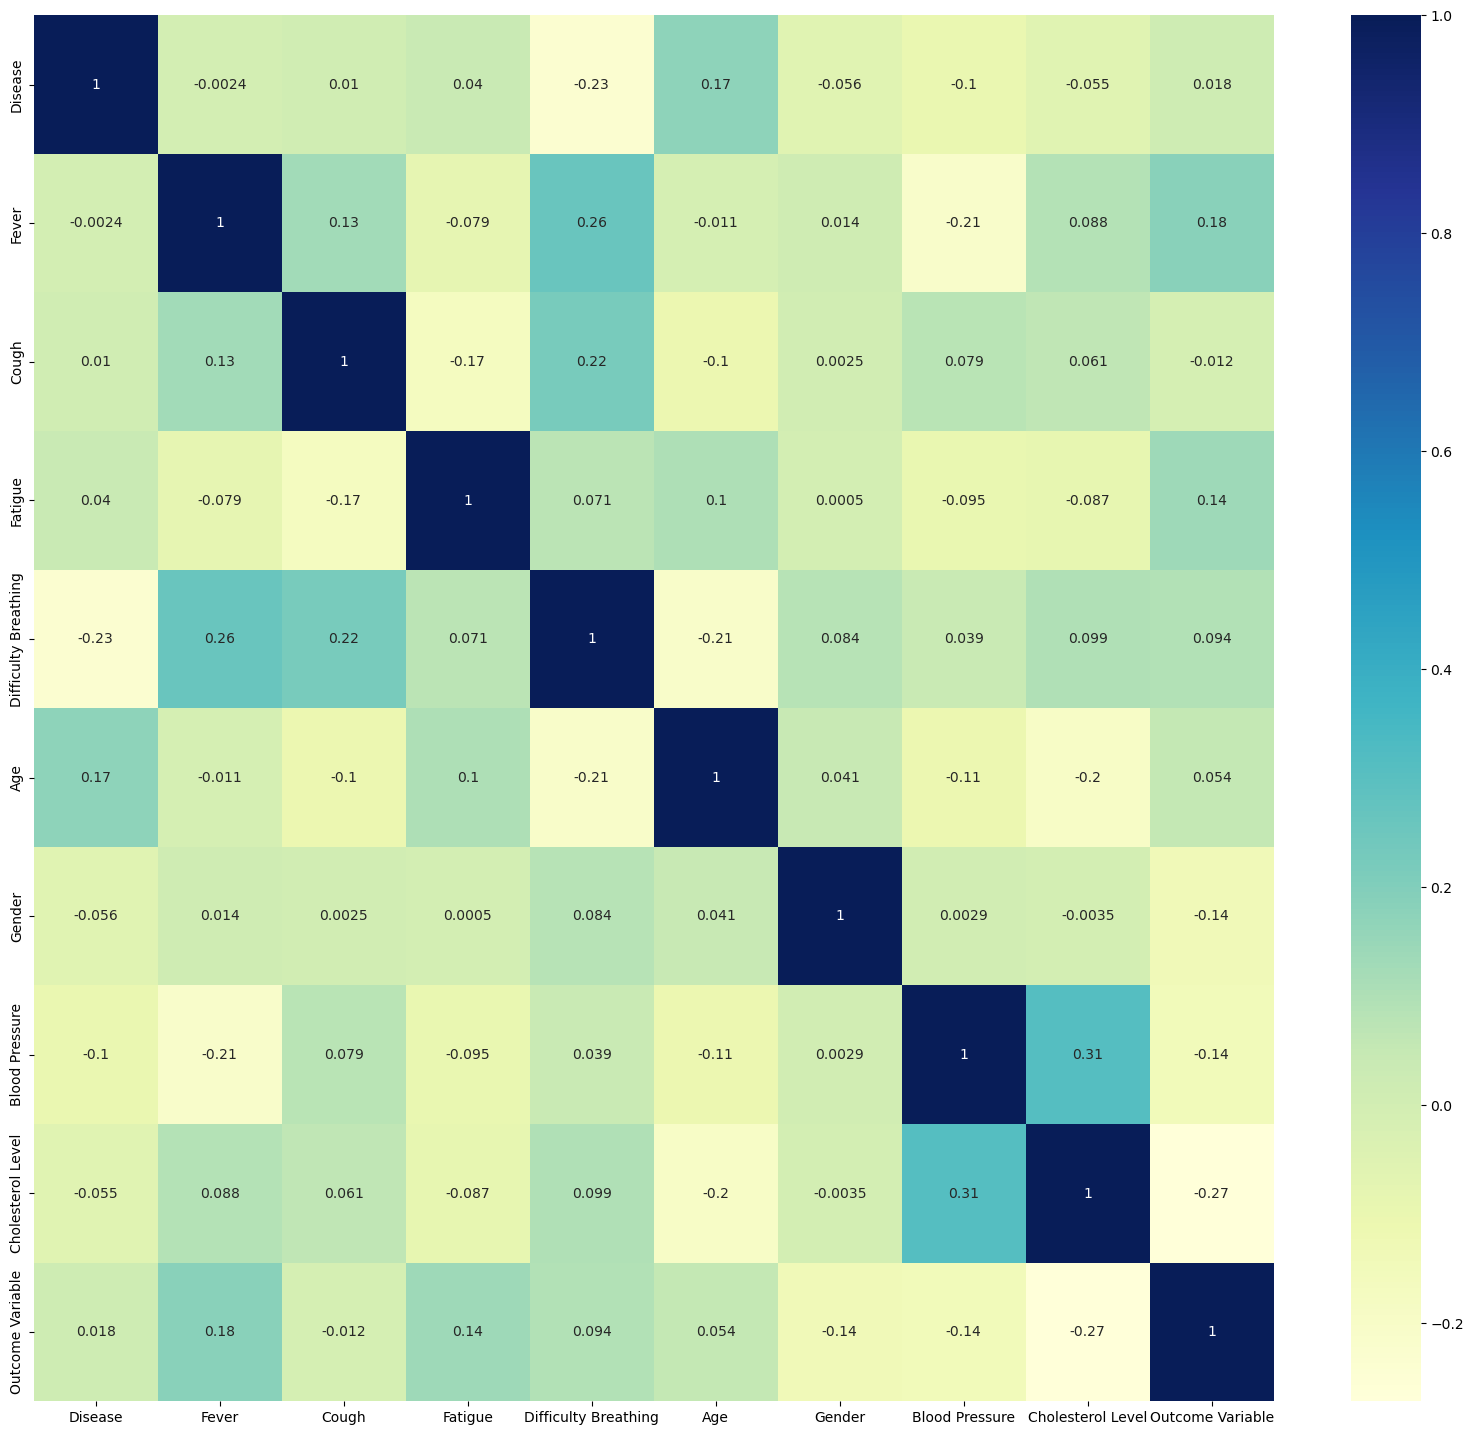

In [12]:
import seaborn as sns

plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

<Axes: >

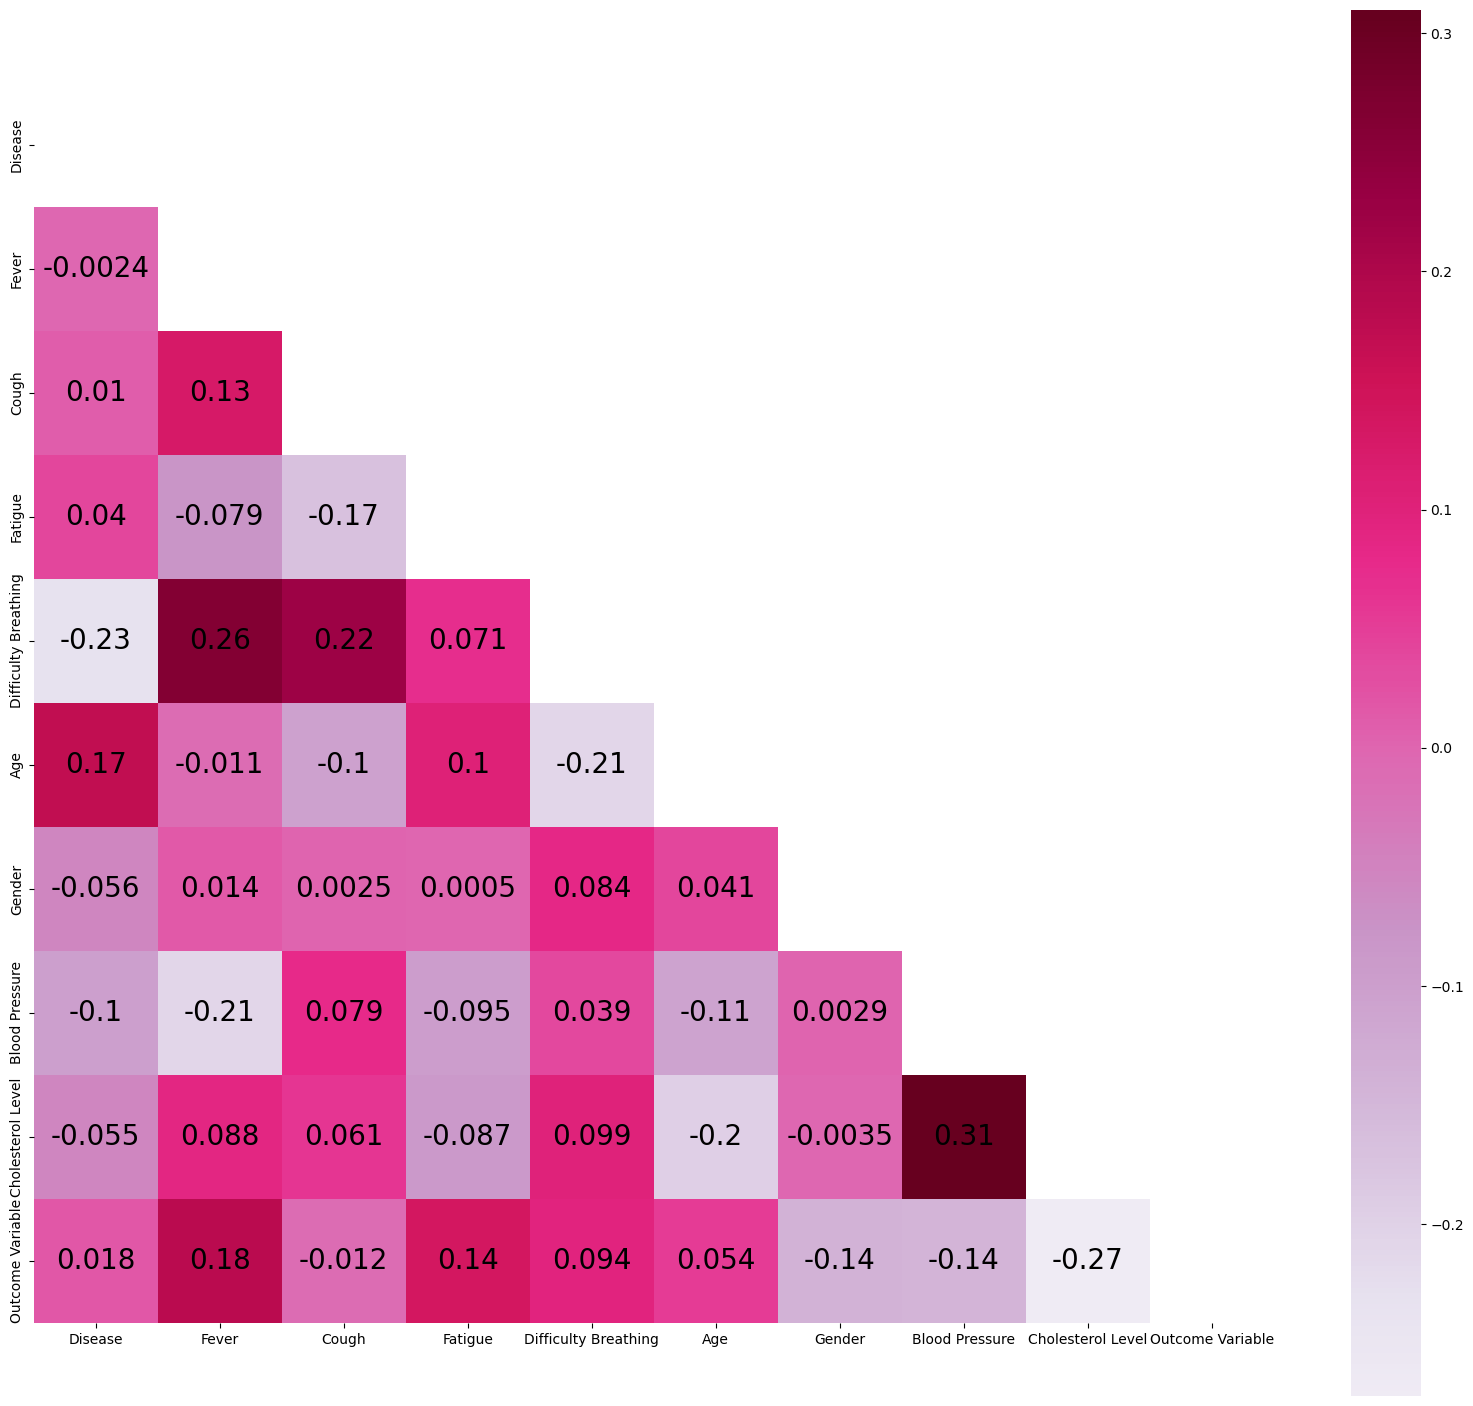

In [13]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize = (20, 18))
sns.heatmap(df.corr(), mask = mask, cmap = 'PuRd', center = 0, square=True, annot = True,annot_kws= {'size': 20, 'color': 'black'})

In [14]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

LR = linear_model.LinearRegression()
Ridge = linear_model.Ridge(alpha= .5) 
RC =  linear_model.RidgeClassifier(alpha= 0.5) # RidgeClassifier
Lasso = linear_model.Lasso(alpha= .5)
MTL= linear_model.MultiTaskLasso(alpha= .5) #Multi Task Lasso
EN = linear_model.ElasticNet(alpha= .5) # Elastic Net
MTEN = linear_model.MultiTaskElasticNet(alpha=.5) #Multi task Elestic Net
LAR = linear_model.Lars() # Least Angle Regression
LLARS = linear_model.LassoLars(alpha=.5) #Lasso Lars 
OMP = linear_model.OrthogonalMatchingPursuit() #Orthogonal Matching persuit
BR = linear_model.BayesianRidge() #Bayesian Regression
LREG = linear_model.LogisticRegression() # Logistic Regression
GLM = linear_model.GammaRegressor(alpha=.5) #General Linear Models 
SGD = linear_model.SGDRegressor() # Stochastic Gardian Descent 
SGDC = linear_model.SGDClassifier() #SGD Classifier
PER = linear_model.Perceptron() # Perception 
PAA = linear_model.PassiveAggressiveRegressor() #Passive Aggressive Algorithms
PAAC = linear_model.PassiveAggressiveClassifier() # PAA Classifier
RR = linear_model.RANSACRegressor() # Robursteness Regression
RRTS =linear_model.TheilSenRegressor() #RR Theil Sen
HR = linear_model.HuberRegressor() # Roburstness Regression Hubert Regression
QR = linear_model.QuantileRegressor() # Quantile Regression 


In [15]:
X = df.drop(['Disease', 'Outcome Variable'], axis = 1)
Y = df['Outcome Variable']

In [16]:
X.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
0,1,0,1,1,19,0,1,2
1,0,1,1,0,25,0,2,2
2,0,1,1,0,25,0,2,2
3,1,1,0,1,25,1,2,2
4,1,1,0,1,25,1,2,2


In [17]:
Y.head()

0    1
1    0
2    0
3    1
4    1
Name: Outcome Variable, dtype: int32

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.2, random_state= 42)

In [19]:
def Reg_Score(reg):
    
    reg.fit(X_train, Y_train)
    predict = reg.predict(X_test)
    print('Accuracy: ', accuracy_score(predict, Y_test))

In [20]:
Reg_Score(RC)

Accuracy:  0.6


In [21]:
Reg_Score(LREG)

Accuracy:  0.6107142857142858


In [22]:
Reg_Score(SGDC)

Accuracy:  0.4607142857142857


In [23]:
Reg_Score(PER)

Accuracy:  0.475


In [24]:
Reg_Score(PAAC)

Accuracy:  0.525


In [25]:
Reg_Score(RR)

Accuracy:  0.525


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Models = [('LR', LogisticRegression()), 
          ('DTC', DecisionTreeClassifier()), 
          ('RFC', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()), 
          ('svm', SVC()), 
          ('NB', GaussianNB()), 
         ]

for name, Model in Models:
    PL = Pipeline(steps = [('model', Model)])

    PL.fit(X_train, Y_train)
    Yhat = PL.predict(X_test)
    
    acc = accuracy_score(Y_test, Yhat)
    print(f'{name} : Accuracy Score is', acc)

LR : Accuracy Score is 0.6107142857142858
DTC : Accuracy Score is 0.6392857142857142
RFC : Accuracy Score is 0.6642857142857143
KNN : Accuracy Score is 0.5607142857142857
svm : Accuracy Score is 0.525
NB : Accuracy Score is 0.6071428571428571


In [46]:
from sklearn.ensemble import VotingClassifier

VC = [('LR', LogisticRegression()), 
          ('DTC', DecisionTreeClassifier()), 
          ('RFC', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()), 
          ('svm', SVC(probability=True)), 
          ('NB', GaussianNB()), 
         ]
Voting_VC = VotingClassifier(estimators=VC, voting='soft', weights=[1,1,2,1,2,1])

PL = Pipeline(steps = [('model', Voting_VC)])

PL.fit(X_train, Y_train)
Yhat = PL.predict(X_test)
    
acc = accuracy_score(Y_test, Yhat)
print(f'Voting Classifier: accuracy Score= {acc: 2f}')

Voting Classifier: accuracy Score=  0.653571


In [47]:
from sklearn.ensemble import StackingClassifier

VC = [('LR', LogisticRegression()), 
          ('DTC', DecisionTreeClassifier()), 
          ('RFC', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()), 
          ('svm', SVC(probability=True)), 
          ('NB', GaussianNB()), 
         ]
Stacking_SC = StackingClassifier(estimators=VC, final_estimator=LogisticRegression())

PL = Pipeline(steps = [('model', Stacking_SC)])

PL.fit(X_train, Y_train)
Yhat = PL.predict(X_test)
    
acc = accuracy_score(Y_test, Yhat)
print(f'Voting Classifier: accuracy Score= {acc: 2f}')

c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier: accuracy Score=  0.642857
